<h1> Vehicle Insurance Sells </h1>

<br> Jiadi Huang

<p>Data retrieved from <a href = https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=test.csv> Kaggle  </a> </p>


<h2> Introduction </h2>

<p>The reserach question is what factors influence different types of people to buy auto insurances from a specific company.</p>

The data can be found on Kaggle and contains general information of people the company reached out, where the company collects their potential buyers' gender, age, anual premium etc. and records whether they bought the insurance or not, with 1 being they did, and 0 being they didn't. Upon exploration, variables Gender, Previously_Insured, Vehicle_Age and Vehicle_Damage put significant contributions to the prediction of responses, as explained in the analysis below. The purpose of choosing this topic is to create an ideal model where the company inserts one's information (varaibles as mentioned above), and will be given a prediction of the likliness of that person buying their insurance. This enables the company to eliminate unnecessary follow-ups and sales pursuing those who are less likely to buy insurance, and thus saves both time and resources for actual future clients. The result is important because it not only helps the unsurance company categorize their customers, but also gives its readers a general sense of the relationship between each variable and final response in terms of car insurances. By using a logistic model, I get a better sense as to which variables the company should pay more attention to in order to increase their sellings. I was also able to use a KNN model to locate those who are more likely not interested in buying the insurance. The reason for using logistic and KNN models is that logistic models are specifically designed for binary independent variables, in the case, response = 0 and response = 1, thus I feel like this is the most appropriate model used to predict the results; furthermore, KNN models are easy to train and are good starting points since I would like to separate the possible future customers in to interested/uninterested categories. As a result, the final accuracy rate for both models are approximately 87%, which is fairly accurate and is suitable for predictions. 

<h2>Data Description </h2>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

In [50]:
df = pd.read_csv("insurance_sales_data.csv")
df = df.drop("Unnamed: 0", axis = 1)
df

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,28,0,2,1,40454.0,26,217,1
1,2,1,76,3,0,1,0,33536.0,26,183,0
2,3,1,47,28,0,2,1,38294.0,26,27,1
3,4,1,21,11,1,0,0,28619.0,152,203,0
4,5,0,29,41,1,0,0,27496.0,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...
380292,381105,1,74,26,1,1,0,30170.0,26,88,0
380293,381106,1,30,37,1,0,0,40016.0,152,131,0
380294,381107,1,21,30,1,0,0,35118.0,160,161,0
380295,381108,0,68,14,0,2,1,44617.0,124,74,0


<h4> Observations </h4>

<p> Each row is a different observation, a customer that purchased or did not purchase the insurance product. </p>

<h4> Attributes </h4>

<p>id : Unique ID for the customer <br>
Gender : Gender of the customer 1: Male 0: Female<br>
Age : Age of the customer<br>
Region_Code : Unique code for the region of the customer<br>
Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance<br>
Vehicle_Age : Age of the Vehicle 0: less than 1 year , 1: 1-2 years , 2: greater than 1 year <br>
Vehicle_Damage : 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.<br>
Annual_Premium : The amount customer needs to pay as premium in the year<br>
Policy_Sales_Channel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
Vintage : Number of Days, Customer has been associated with the company<br>
Response : 1 : Customer is interested, 0 : Customer is not interested <p>

<h4>Reasons for Creation of the dataset </h4>

Datasets is created by an insurance company who needs help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. Dataset was found on Kaggle.

<h4>Funds for Creation of the dataset</h4>

The insurance company that asked for help on Kaggle funded and created the dataset

<h4> Processes for collecting data </h4>

Surveys were probably being sent out to customers for their private informations, some data such as vintage can be calculated from the insurance company's database.

<h4>Preprocessing of Data </h4>

The data already appears as the raw data from kaggle

<h4>Customers Involved in the datasets </h4>

The customers probably knows their data is being used because most of the data are provided by them. But they probably do not know that the data is used to predict whether other customers would purchase the insurance company's product or not.

<h4> Raw Source Data: </h4>


<a href = https://cornell.box.com/s/6eqwtpdzi7jvgtr10qyk81q1p1mu21kt>dataset</a><br>

<h2> Data analysis </h2>

In [51]:
df

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,28,0,2,1,40454.0,26,217,1
1,2,1,76,3,0,1,0,33536.0,26,183,0
2,3,1,47,28,0,2,1,38294.0,26,27,1
3,4,1,21,11,1,0,0,28619.0,152,203,0
4,5,0,29,41,1,0,0,27496.0,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...
380292,381105,1,74,26,1,1,0,30170.0,26,88,0
380293,381106,1,30,37,1,0,0,40016.0,152,131,0
380294,381107,1,21,30,1,0,0,35118.0,160,161,0
380295,381108,0,68,14,0,2,1,44617.0,124,74,0


I will be only dealing with the train dataset in the data analysis because only train dataset gives the responses

There are a total of 380297 observations in the dataframe.

In [52]:
print("mean age for the dataset is " + str(round(df.Age.mean())))
print("median age for the dataset is " + str(round(df.Age.median())))

mean age for the dataset is 39
median age for the dataset is 36


In [53]:
a18t30 = df[(df.Age >= 18) & (df.Age < 30)]
a30t40 = df[(df.Age >= 30) & (df.Age < 40)]
a40t50 = df[(df.Age >= 40) & (df.Age < 50)]
a50t60 = df[(df.Age >= 50) & (df.Age < 60)]
a60t70 = df[(df.Age >= 60) & (df.Age < 70)]
a70t80 = df[(df.Age >= 70) & (df.Age < 80)]
a80t90 = df[(df.Age >= 80) & (df.Age < 90)]

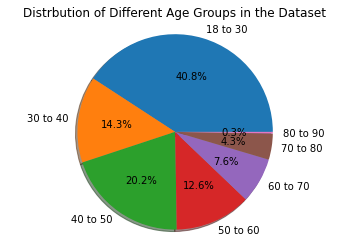

In [54]:
labels = ['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 to 80', '80 to 90']
sizes = [a18t30.id.size, a30t40.id.size, a40t50.id.size, a50t60.id.size, a60t70.id.size, a70t80.id.size, a80t90.id.size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title("Distrbution of Different Age Groups in the Dataset")
plt.show()

We can see that in the dataset, most of the data comes from the age group of 18 to 30.

In [55]:
a18t30r = a18t30[a18t30.Response == 1].id.size / a18t30.id.size
a30t40r = a30t40[a30t40.Response == 1].id.size / a30t40.id.size
a40t50r = a40t50[a40t50.Response == 1].id.size / a40t50.id.size
a50t60r = a50t60[a50t60.Response == 1].id.size / a50t60.id.size
a60t70r = a60t70[a60t70.Response == 1].id.size / a60t70.id.size
a70t80r = a70t80[a70t80.Response == 1].id.size / a70t80.id.size
a80t90r = a80t90[a80t90.Response == 1].id.size / a80t90.id.size

Text(0, 0.5, 'Perecent of People Purchasing Insurance')

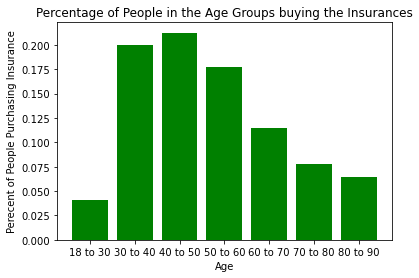

In [56]:
labels = ['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 to 80', '80 to 90']
rates = [a18t30r, a30t40r, a40t50r, a50t60r, a60t70r, a70t80r, a80t90r]
plt.bar(labels, rates, color='green')
plt.title("Percentage of People in the Age Groups buying the Insurances")
plt.xlabel("Age")
plt.ylabel("Perecent of People Purchasing Insurance")

We see that for it is most likely for the age group of 40 to 50 to purchase the insurances

In [57]:
a18t30p = round(a18t30.Annual_Premium.median())
a30t40p = round(a30t40.Annual_Premium.median())
a40t50p = round(a40t50.Annual_Premium.median())
a50t60p = round(a50t60.Annual_Premium.median())
a60t70p = round(a60t70.Annual_Premium.median())
a70t80p = round(a70t80.Annual_Premium.median())
a80t90p = round(a80t90.Annual_Premium.median())

Text(0, 0.5, 'Price for Annual Premium for Different Age Groups')

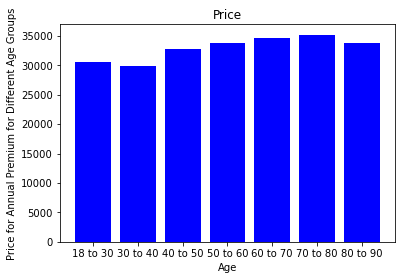

In [58]:
labels = ['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 to 80', '80 to 90']
prices = [a18t30p, a30t40p, a40t50p, a50t60p, a60t70p, a70t80p, a80t90p]
plt.bar(labels, prices, color='blue')
plt.title("Price")
plt.xlabel("Age")
plt.ylabel("Price for Annual Premium for Different Age Groups")

It is clear that for ages between 30 to 40, they have the lowest annual premium, and median annual premium increases steadily till the age of 80.

In [59]:
print("The covariance is " + '{number:.{digits}f}'.format(number = df.Age.cov(df.Annual_Premium), digits = 2))
print("The correlation is " + '{number:.{digits}f}'.format(number = df.Age.corr(df.Annual_Premium), digits = 2))

The covariance is 17782.88
The correlation is 0.07


Text(0, 0.5, 'Price')

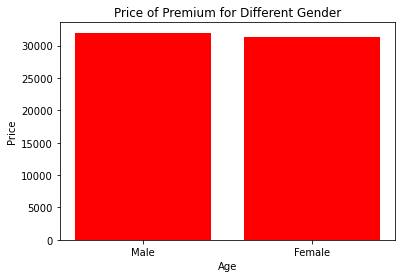

In [60]:
male = df[df.Gender == 1].Annual_Premium.median()
female = df[df.Gender == 0].Annual_Premium.median()

labels = ['Male', 'Female']
prices = [male, female]
plt.bar(labels, prices, color='red')
plt.title("Price of Premium for Different Gender")
plt.xlabel("Age")
plt.ylabel("Price")

We find out that the two variables are not too related and they have a positive relationship

In [61]:
male_buy = df[(df.Gender == 1) & (df.Response == 1)].id.size
male_no_buy = df[(df.Gender == 1) & (df.Response == 0)].id.size
female_buy = df[(df.Gender == 0) & (df.Response == 1)].id.size
female_no_buy = df[(df.Gender == 0) & (df.Response == 0)].id.size

Text(0, 0.5, 'Count')

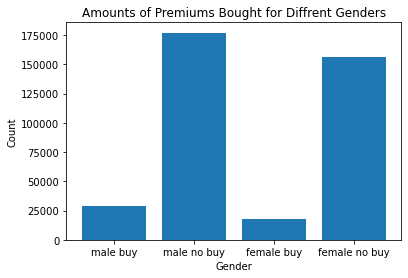

In [62]:
labelss = ['male buy', 'male no buy', 'female buy', 'female no buy']
count = [male_buy, male_no_buy, female_buy, female_no_buy]
plt.bar(labelss, count)
plt.title("Amounts of Premiums Bought for Diffrent Genders")
plt.xlabel('Gender')
plt.ylabel('Count')

We can see that the porportions are fairly similar, with males slightly exceeding females in both buying and not buying the premiums.

In [63]:
switch_company = df[(df.Previously_Insured == 1) & (df.Response == 1)].id.size
newbie = df[(df.Previously_Insured == 0) & (df.Response == 1)].id.size
no_longer = df[(df.Previously_Insured == 1) & (df.Response == 0)].id.size
never_been = df[(df.Previously_Insured == 0) & (df.Response == 0)].id.size

Text(0.5, 1.0, 'previously insured and response to buying insurance')

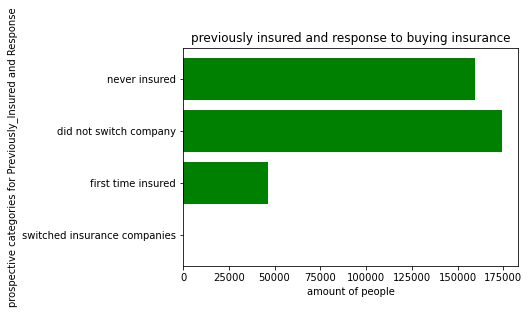

In [64]:
names = ['switched insurance companies', 'first time insured', 'did not switch company', 'never insured']
countt = [switch_company, newbie, no_longer, never_been]
plt.barh(names, countt, color = 'green')
plt.xlabel('amount of people')
plt.ylabel('prospective categories for Previously_Insured and Response')
plt.title('previously insured and response to buying insurance')

As shown on the graph, the majority of customers prefer to stay with the current insurance company if they have one. We can see that the number of customers who switched companies is approximately zero (or super low). It also stuck out that lots of people prefer to not insure their car at all, corroborated by the first bar labeled 'never insured' on the graph.

In [65]:
df.Vintage.describe()

count    380297.000000
mean        154.344118
std          83.673028
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [66]:
df.Vintage.median()

154.0

Nothing stands out for the vintage variable

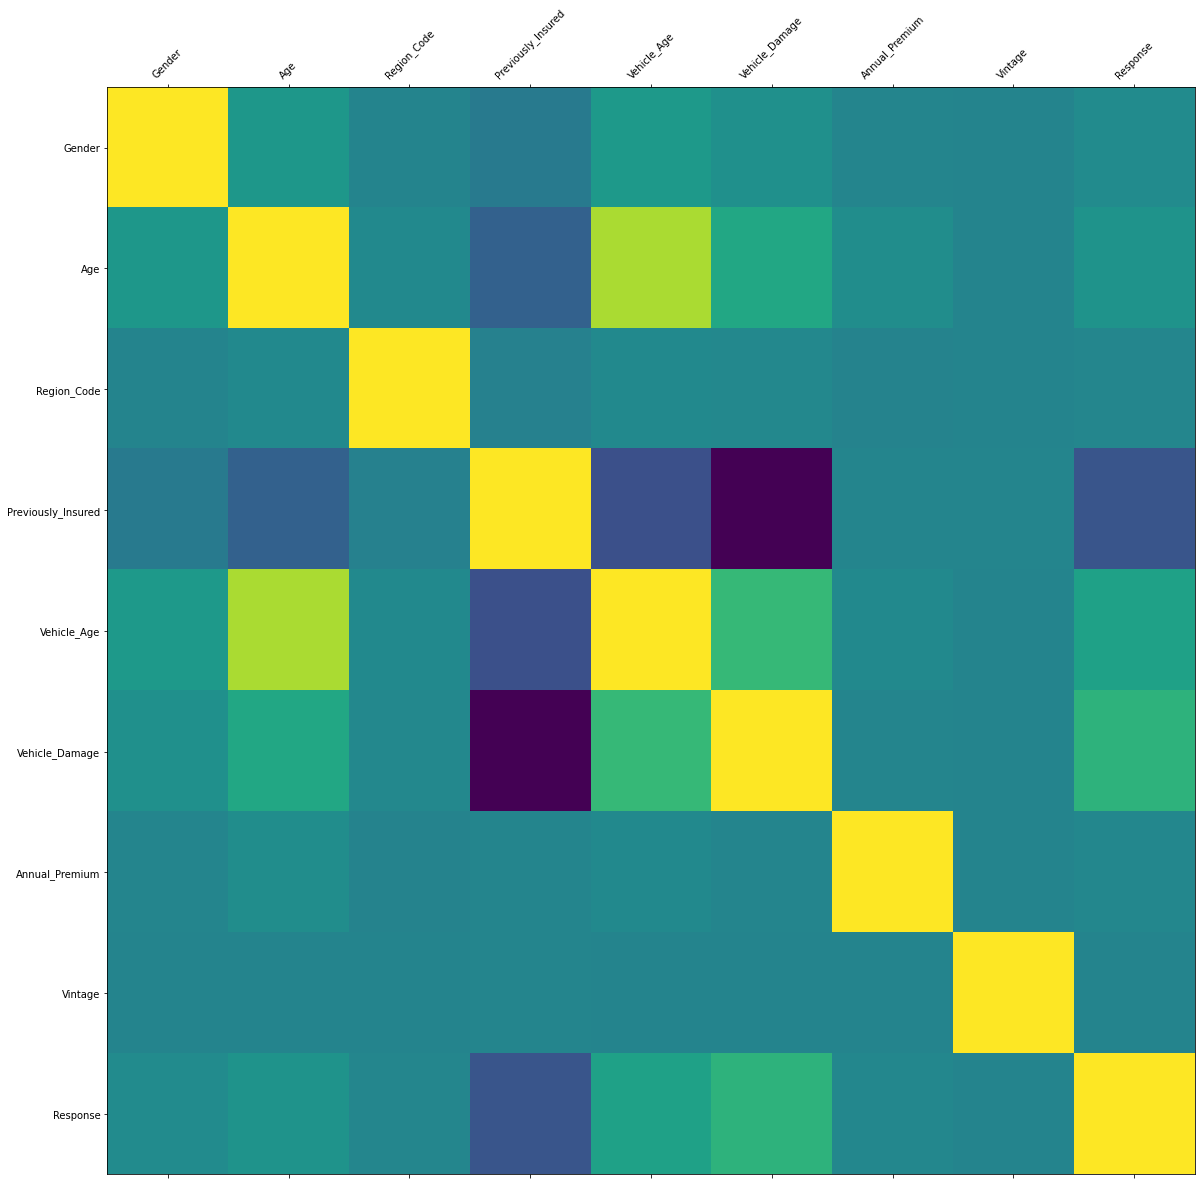

In [67]:
X=df.drop(['id','Policy_Sales_Channel'], axis=1)
corr = X.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(corr)

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

fig.set_size_inches(20, 20)
plt.show()

Vehicle Damage and Previously Insured has a deep color

In [68]:
print("The correlation is " + '{number:.{digits}f}'.format(number = df.Vehicle_Damage.corr(df.Previously_Insured), digits = 2))

The correlation is -0.82


We can see that the two variables are strongly correlated

Text(0, 0.5, 'Different Situations for Damaged and Insured')

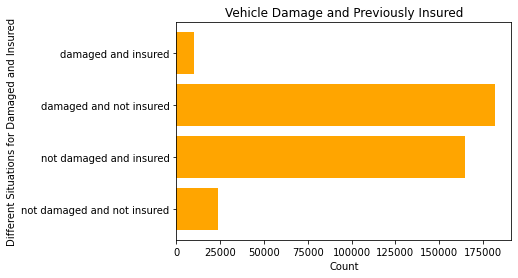

In [69]:
dp00 = df[(df.Vehicle_Damage == 0) & (df.Previously_Insured == 0)].id.size
dp01 = df[(df.Vehicle_Damage == 0) & (df.Previously_Insured == 1)].id.size
dp10 = df[(df.Vehicle_Damage == 1) & (df.Previously_Insured == 0)].id.size
dp11 = df[(df.Vehicle_Damage == 1) & (df.Previously_Insured == 1)].id.size

label = ["not damaged and not insured", "not damaged and insured", "damaged and not insured", "damaged and insured"]
price = [dp00, dp01, dp10, dp11]

plt.barh(label, price, color='orange')
plt.title("Vehicle Damage and Previously Insured")
plt.xlabel("Count")
plt.ylabel("Different Situations for Damaged and Insured")


We can see now that there are a lot more damaged and not insured, not damaged and insured than the other two, this explains the convariance.

In [70]:
X = df.drop(['id', 'Response'], axis=1)
Y = df['Response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
modellog = LogisticRegression(max_iter=10000)
rfe = RFE(modellog)
logistic_model = rfe.fit(X_train, Y_train)

logistic_model.fit(X_train, Y_train)

pred_train = logistic_model.predict(X_train)
pred_test = logistic_model.predict(X_test)

print("Test Accuracy: ", accuracy_score(Y_test, pred_test))
print("Training Accuracy: ", accuracy_score(Y_train, pred_train))


Test Accuracy:  0.8782145674467525
Training Accuracy:  0.877049799991454


In [71]:
print("Selected Features: %s" % logistic_model.support_)
for i in range(len(X.columns)):
    if (logistic_model.support_[i]):
        print(X.columns[i])

Selected Features: [ True False False  True  True  True False False False]
Gender
Previously_Insured
Vehicle_Age
Vehicle_Damage


In [87]:
x = df[['Gender', 'Age', 'Vehicle_Age', 'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium']]
y = df['Response'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 115)

In [88]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
print("accuracy of knn model: ", knn.score(x_test, y_test))

accuracy of knn model:  0.8667104917170655


<h2>Evaluation of Significance</h2>

In [83]:
import statsmodels. api as sm  
X = df.drop(['id', 'Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage','Response'], axis=1)
Y = df['Response']
log_reg = sm.Logit(Y, X).fit() 

Optimization terminated successfully.
         Current function value: 0.314173
         Iterations 11


In [84]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               380297
Model:                          Logit   Df Residuals:                   380293
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 Dec 2020   Pseudo R-squ.:                  0.1561
Time:                        18:36:25   Log-Likelihood:            -1.1948e+05
converged:                       True   LL-Null:                   -1.4159e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Gender                -0.4044      0.010    -42.150      0.000      -0.423      -0.386
Previously_Insured    -6.8035      0.080    -85.362      0.000      -6.960      -6.647
Vehicle_Age         

for gender variable, it has a z score of -42.15 and a p-value less than 0.001, which means it is significant in prediciting whether a customer will purchase the product or not. It applies to the previously_Insured variable, Vehicle_Age variable, Vehicle_Damage variable as well, we see that the p-values are all less than 0.001 which means that feature selection is successful in the data analysis section. All the selected variables are significant in predicting the response variable through a logistic regression.

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65521  1178]
 [ 8960   401]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66699
           1       0.25      0.04      0.07      9361

    accuracy                           0.87     76060
   macro avg       0.57      0.51      0.50     76060
weighted avg       0.80      0.87      0.82     76060



For the responses, 0 indicates the customer won't buy the insurance, and 1 being that they will. We can see from the precision score that 88% of the '0' responses were predicted correctly, however only 25% of the predicted '1' responses were accurate. Arguably a large sum of the data consists of customers who indicated that they won't buy the insurance, thus the weighted average precision is relatively high, 80%. For a KNN model we can't explicitly see how each of the variables contribute their significance and prediction accuracy.

<h2> Interpretation and Conclusions </h2>

<h4>Logistic Regression</h4>

From the logistic model we can see that the features selected are Gender, Previously_Insured, Vehicle_Age and Vehicle_Damage. The features are selected through the rfe(recursive feature elimination) process. Thus the weakest varaibles are dropped, and variables with collinearities are dropped. Interestingly enough, they are all categorical variables. The accuracy score I got from the model is 87% which I believe is a very high score for predicting whether a customer will purchase a product or not. If we can accurately predict whether customers will purchase the product 87% of the time, companies can better allocate resources for better marketing strategies. Companies can focus on specific Gender, Previously Insured status, Vehicle Age status and Vehicle Damage status to better target which customers are more likely to purchase their products. For Gender, we can see that the coefficient of the logistic model if -0.4044, which means being female will make the purchasing of the product more likely. The reason for this might be in a family, the wife might have more say in buying power. As a result, more females will make the decision of whether or not the insurance should be bought or not. So marketing strategies for this company should target females. For the previously Insured variable, we see that not being previously insured at another company is very important in predicitng whether the customer will buy the insruance product. The coefficient is -6.8 which is very high compared to the other significant variables. The reason for this might be it is unlikely for individuals to switch insurance companies once the individual is willing to buy an isurance product already. For the Vehicle_Age variable, we see that it has a coefficient of 0.0311 which is not very high, but its p-value determines that it is significant. It is more liekly for individuals that owns vehicle that has a higher vehicle age to buy the product. Since vehicle age is high, it is more likely for the vehicle to run into problems, therefore an insurance might be needed. For the vehicle damage variable, it is more likely for individuals that own cars that didn't havev vehicle damage before to buy the insurance product. This is probably because if individual's car is damaged, it is pointless now to buy the product and also the product will be much more pricier for the individual due to how insurance works. So according to the logistic model, in order for the company to sell their product better, they should focus on the following variables: Gender, Prevviously_Insured, Vehicle_Age and Vehicle_Damage.

<h4> KNN model <h4>

The KNN model is used to sort potential buyers into two categories, (rather than for prediction). K value is set to 4, meaning that 4 of the closest training samples to the point is selected then placed into one of the two categories. There are a number of ways to find this number, and first tried the square root of the number of observations in the training set (552). However for this number it is found that the prediction for response = 1 is 0% accuracy. After that I started from 1 and continued to go up, realizing that 4 gives the best general accuracy  percentage. For this KNN model, the independent variables chosen to predict the response are Gender, Age, Vehicle_Age, Previously_Insured, Vehicle_Damage, and Annual_Premium. Age and Annual_Premium are quantitative data while all the other ones are categorical. It is known that KNN models work better with quantitative data, and with 33% of selected variables being quantitative, the accuracy score is 87%, which is still relatively high. I dropped features id, region_code, policy_sales_channel and vintage because there's no way for me to make sense of what those numbers mean (i.e. I don't know what each represent). However, as seen from the confusion matrix and classification report, this model predicts the likelihood of a potential customer turning down the insurance offer as opposed to buying it. Out of 66699 test cases with response '0', 65521 cases were indeed tested accurate, and out of 9361 test cases with response '1', only 322 cases turned out to be true, summing up to a total of 76060 test cases. This further corroborates the finding that while I can use this model to accurately classify customers who are not interested, it is not the best model to test that they are.

<h2>Limitations</h2>

<p> Different Age group might lead to different groups with different amount of wealth. Maybe it will be shown that older people are more likely to purchase the insurance, but it might not be a causation, it can just be a correlation. </p>

<p> Information on exactly what each different number for policy sales channels stand for is not provided, but it is definitely an important reason for why people choose to purchase insurances.</p>

<p> For each columns, if one speicfic value appears too many times, the analysis might be inaccurate because the model built might not predict the values with less appearnces accurately. So for example, if for vehicle age, only 100 datasets for vehicles under 1 year is avilable, then the model for predicting the response might not be accurate for that specific feature.</p>

If there are not enough data for a certain category, we might not be able to make an accurate prediction.

<h2>Source Code</h2>

Github Repository Link: https://github.coecis.cornell.edu/wz229/INFO-2950-project
Data cleaning file is included in the Repository